In [1]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import cycle, islice
import math

In [2]:
df_clean = pd.read_csv('df_clean.csv')

In [3]:
df_clean.head()

,fullVisitorId,channelGrouping,date,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,sessionQualityDim,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue,source,weekday,day,month,year
0,1002211220666816283,Organic Search,2017-10-16,1508211988,1,1.508212e+09,Chrome,Windows,False,desktop,...,1.0,0,0,0,0,google,0,16,10,2017
1,1003163948327617003,Organic Search,2017-10-16,1508208414,1,1.508208e+09,Safari,iOS,True,mobile,...,1.0,0,0,0,0,google,0,16,10,2017
2,1003603370068451269,Direct,2017-10-16,1508172579,1,1.508173e+09,Chrome,Android,True,mobile,...,1.0,0,0,0,0,(direct),0,16,10,2017
3,1004815406280493342,Direct,2017-10-16,1508192070,1,1.508192e+09,Chrome,Android,True,mobile,...,1.0,70,0,0,0,(direct),0,16,10,2017
4,1005132064962959014,Organic Search,2017-10-16,1508164370,1,1.508164e+09,Chrome,Macintosh,False,desktop,...,1.0,0,0,0,0,google,0,16,10,2017


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9210 entries, 0 to 9209
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            9210 non-null   uint64 
 1   channelGrouping          9210 non-null   object 
 2   date                     9210 non-null   object 
 3   visitId                  9210 non-null   int64  
 4   visitNumber              9210 non-null   int64  
 5   visitStartTime           9210 non-null   float64
 6   browser                  9210 non-null   object 
 7   operatingSystem          9156 non-null   object 
 8   isMobile                 9210 non-null   bool   
 9   deviceCategory           9210 non-null   object 
 10  continent                9196 non-null   object 
 11  subContinent             9196 non-null   object 
 12  country                  9196 non-null   object 
 13  hits_y                   9210 non-null   int64  
 14  pageviews               

In [5]:
df_clean['fullVisitorId'] = df_clean['fullVisitorId'].astype(str)
df_clean['visitId'] = df_clean['visitId'].astype(str)

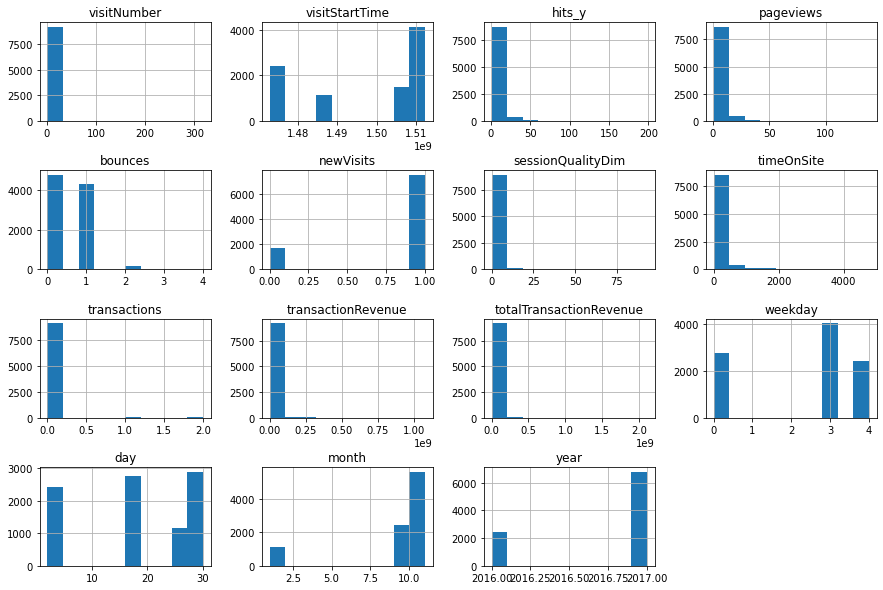

In [6]:
# All histograms
df_clean.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

In [7]:
df_none_zero = df_clean[df_clean['totalTransactionRevenue'] > 0]

In [8]:
df_clean['totalTransactionRevenue'].describe()

count    9.210000e+03
mean     1.586262e+06
std      3.470971e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.103690e+09
Name: totalTransactionRevenue, dtype: float64

In [9]:
df_none_zero['totalTransactionRevenue'].describe()

count    9.800000e+01
mean     1.490762e+08
std      3.035854e+08
min      6.150000e+06
25%      3.029500e+07
50%      5.320500e+07
75%      1.103950e+08
max      2.103690e+09
Name: totalTransactionRevenue, dtype: float64

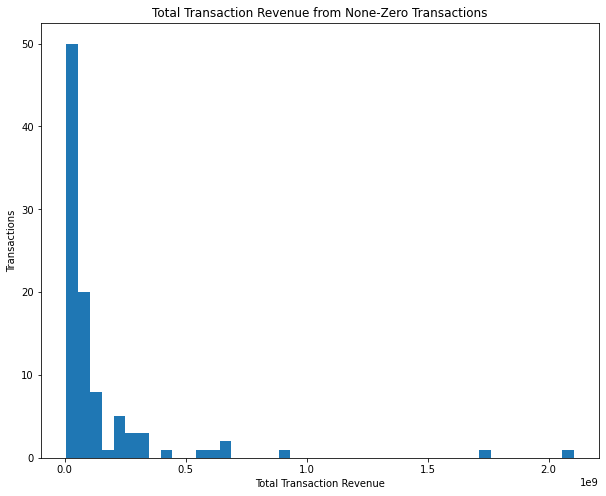

In [10]:
# Total Transaction Revenue from None-Zero Transactions
w = 50000000
n = math.ceil((df_clean['totalTransactionRevenue'].max() - df_clean['totalTransactionRevenue'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df_none_zero['totalTransactionRevenue'], bins = n)
plt.title('Total Transaction Revenue from None-Zero Transactions')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Transactions');

In [11]:
df_clean['transactionRevenue'].describe()

count    9.210000e+03
mean     1.255798e+06
std      2.239506e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.077000e+09
Name: transactionRevenue, dtype: float64

In [12]:
df_none_zero['transactionRevenue'].describe()

count    9.800000e+01
mean     1.180194e+08
std      1.835558e+08
min      5.150000e+06
25%      2.516250e+07
50%      4.564000e+07
75%      1.060800e+08
max      1.077000e+09
Name: transactionRevenue, dtype: float64

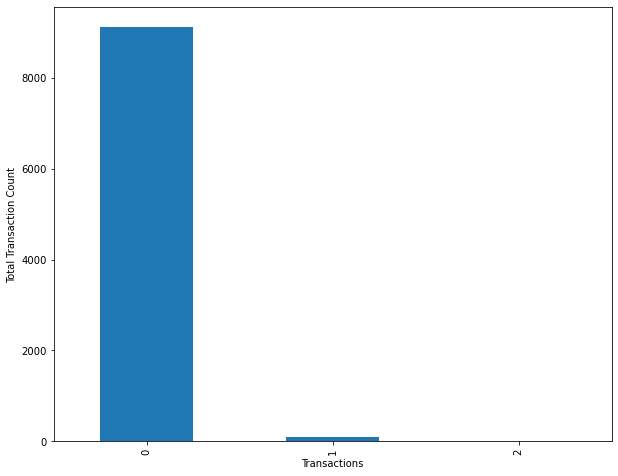

In [13]:
# Total Transactions count from all Transactions
plt.figure(figsize=(10,8))
df_clean.groupby('transactions')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Transaction Count')
plt.xlabel('Transactions');

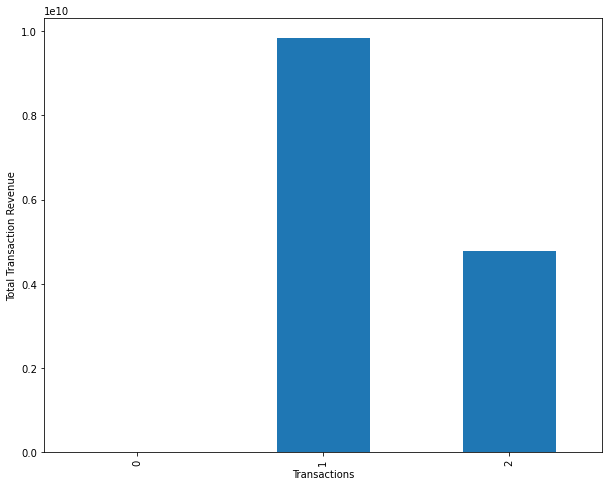

In [14]:
# Total Transaction Revenue from all Transactions
plt.figure(figsize=(10,8))
df_clean.groupby('transactions')['totalTransactionRevenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Transactions');

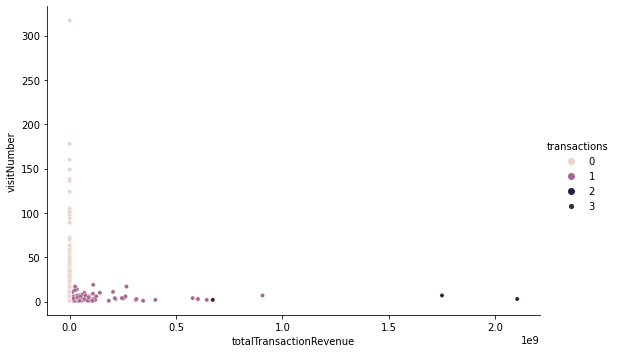

In [15]:
# Transaction revenue and visitnumber scatterplot sorted by transactions
sns.relplot(data=df_clean, x='totalTransactionRevenue', y='visitNumber', hue='transactions', size=3, aspect=1.5);

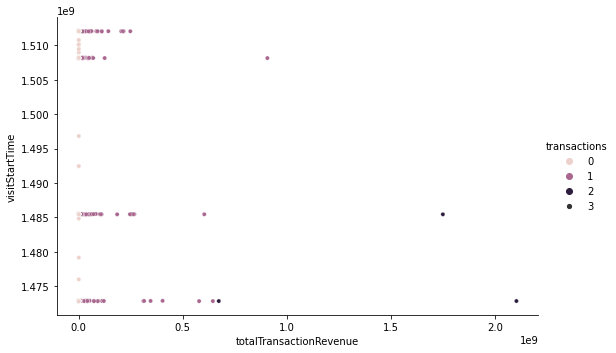

In [16]:
# Transaction revenue and visitStartTime scatterplot sorted by transactions
sns.relplot(data=df_clean, x='totalTransactionRevenue', y='visitStartTime', hue='transactions', size=3, aspect=1.5);

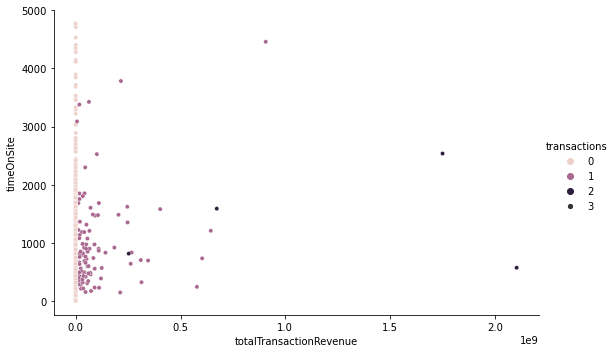

In [17]:
# Transaction revenue and timeOnSite scatterplot sorted by transactions
sns.relplot(data=df_clean, x='totalTransactionRevenue', y='timeOnSite', hue='transactions', size=3, aspect=1.5);

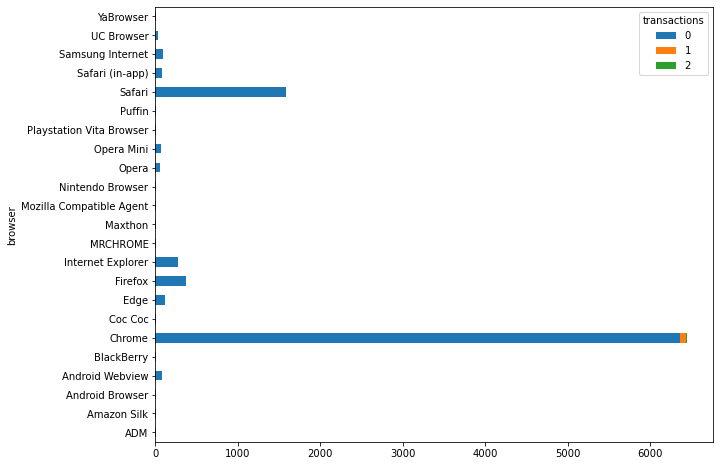

In [18]:
# Transaction count for all Transactions by browser
df_grouped = df_clean.groupby(['browser', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

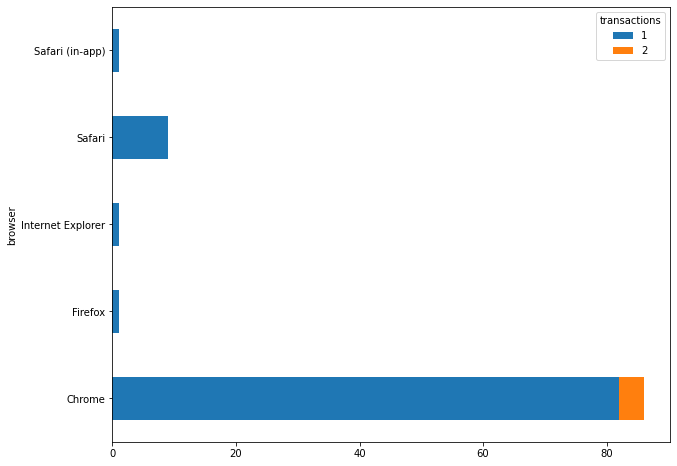

In [19]:
# Transaction count for none zero transactions revenue by Browser
df_grouped_none = df_none_zero.groupby(['browser', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped_none.plot(kind='barh', figsize=(10, 8), stacked=True);

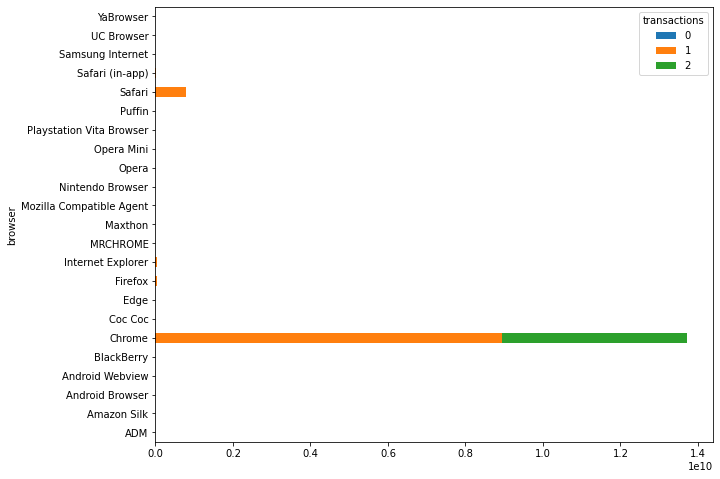

In [20]:
# Transaction revenue by browser
df_grouped = df_clean.groupby(['browser', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

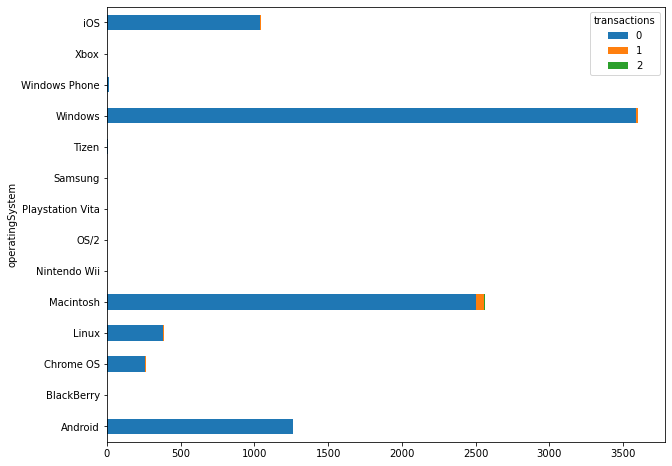

In [21]:
# Transaction count for all Transactions by operating system
df_grouped = df_clean.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

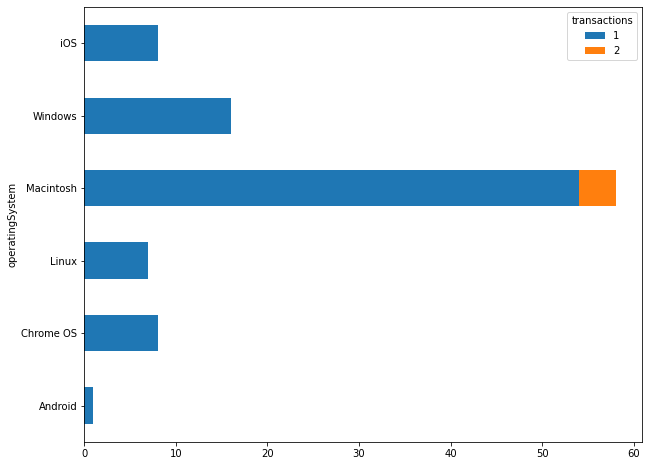

In [22]:
# Transaction count for none zero Transactions by operating system
df_grouped = df_none_zero.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

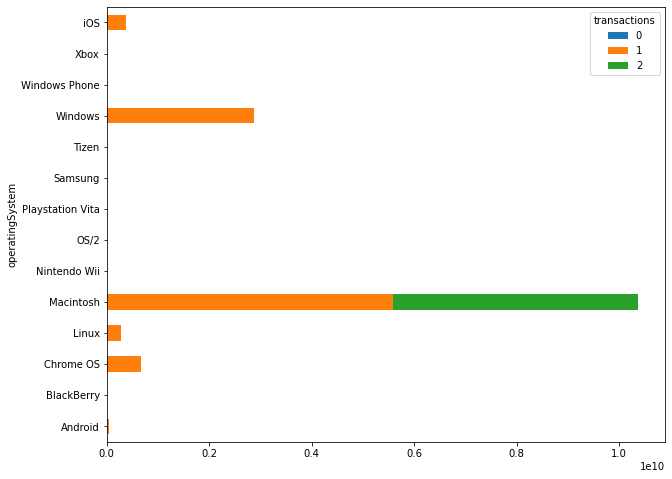

In [23]:
# Transaction revenue by browser
df_grouped = df_clean.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

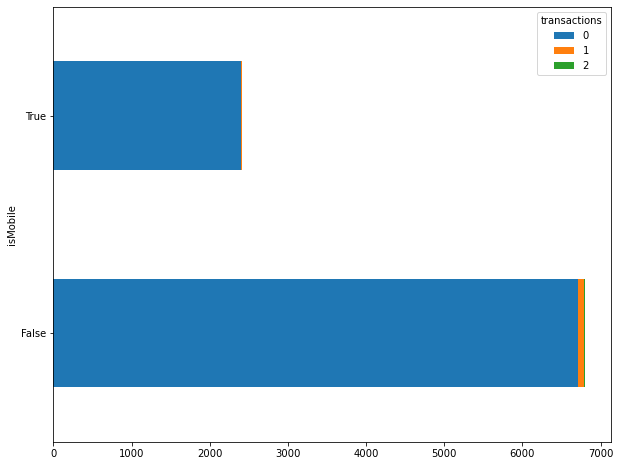

In [24]:
# Transaction count for all Transactions by 'isMobile'
df_grouped = df_clean.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

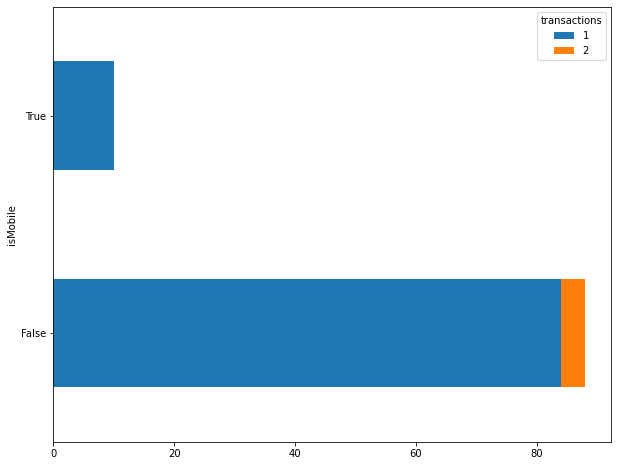

In [25]:
# Transaction count for none zero Transactions by 'isMobile'
df_grouped = df_none_zero.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

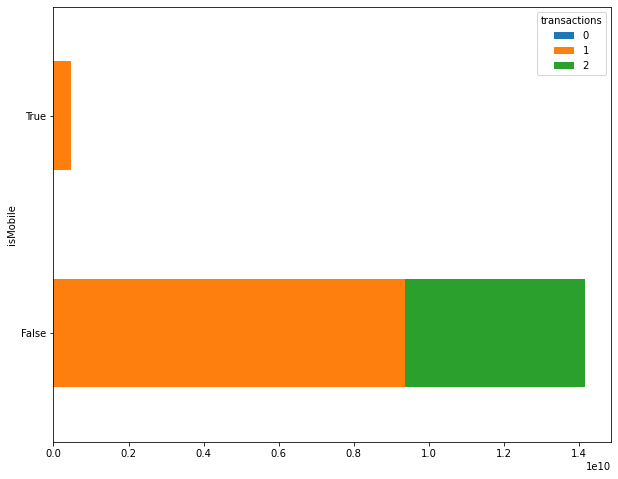

In [26]:
# Transaction revenue by 'isMobile'
df_grouped = df_clean.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

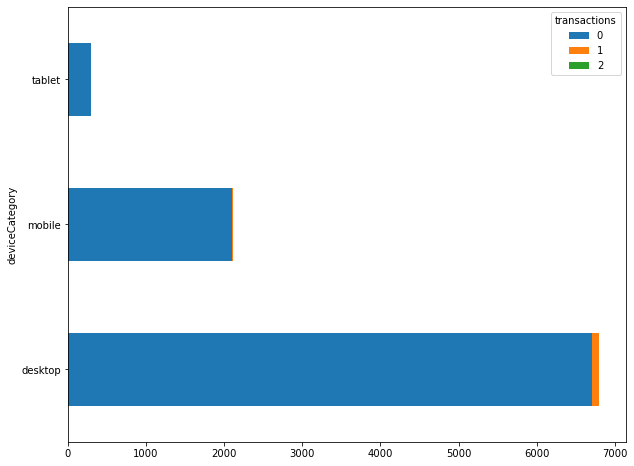

In [27]:
# Transaction count for all Transactions by 'deviceCategory'
df_grouped = df_clean.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

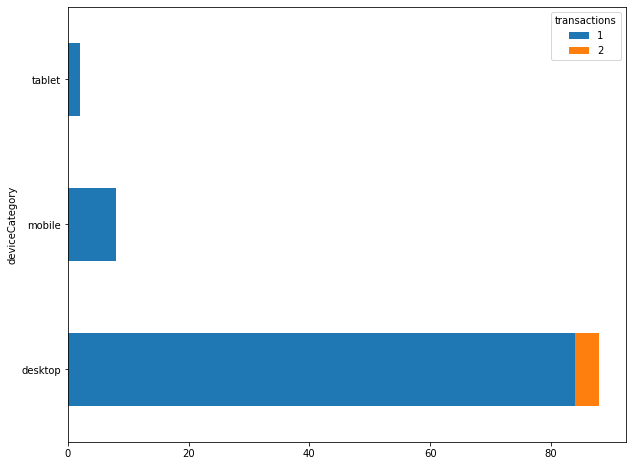

In [28]:
# Transaction count for none zero Transactions by 'deviceCategory'
df_grouped = df_none_zero.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

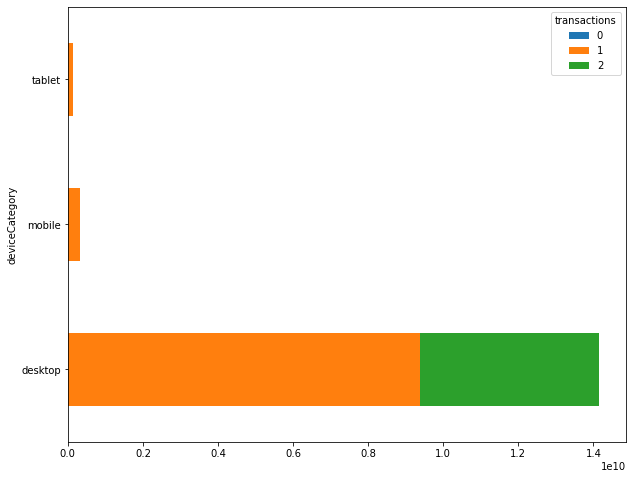

In [29]:
# Transaction revenue by 'deviceCategory'
df_grouped = df_clean.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

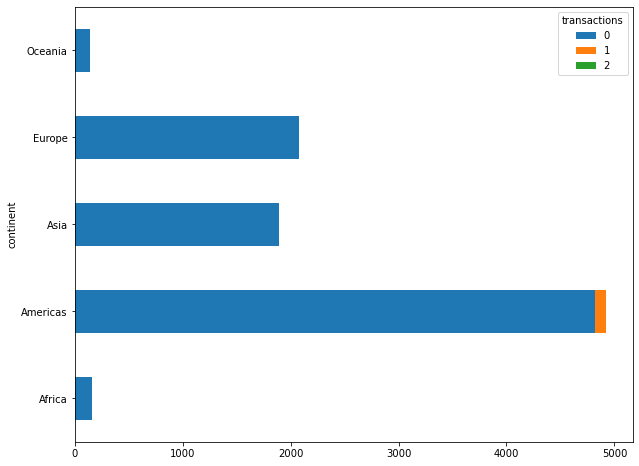

In [30]:
# Transaction count for all Transactions by 'continent'
df_grouped = df_clean.groupby(['continent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

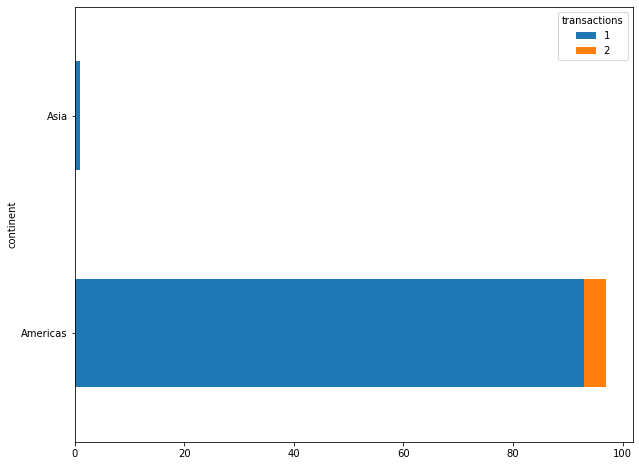

In [31]:
# Transaction count for none zero Transactions by 'continent'
df_grouped = df_none_zero.groupby(['continent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

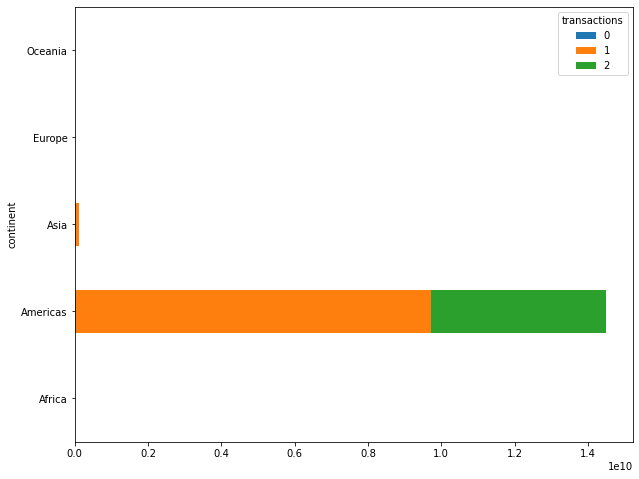

In [32]:
# Transaction revenue by 'continent'
df_grouped = df_clean.groupby(['continent', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

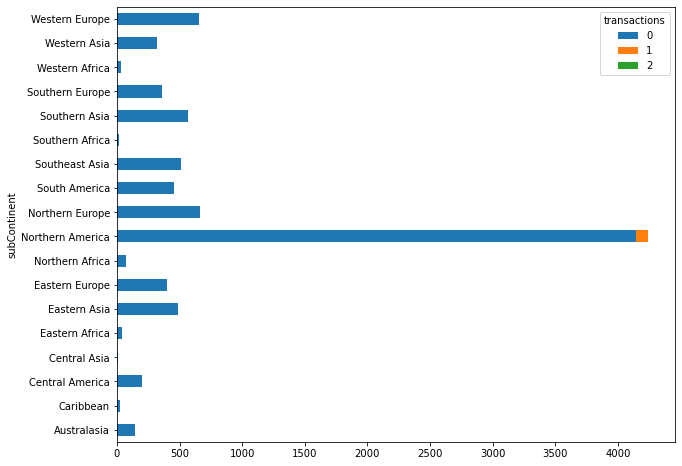

In [33]:
# Transaction count for all Transactions by 'subContinent'
df_grouped = df_clean.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8),  stacked=True);

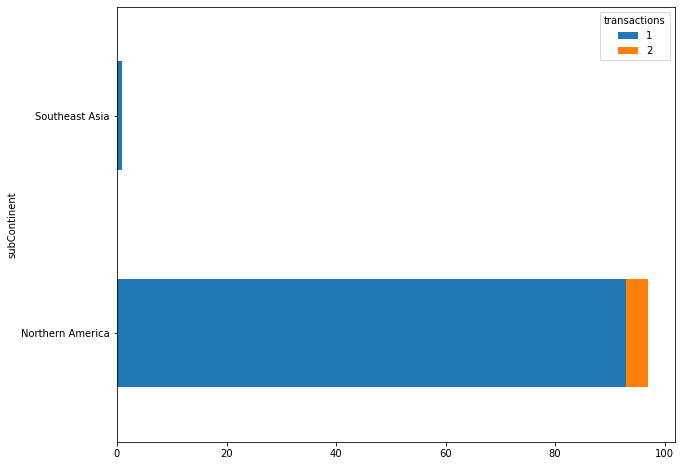

In [34]:
# Transaction count for none zero Transactions by 'subContinent'
df_grouped = df_none_zero.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

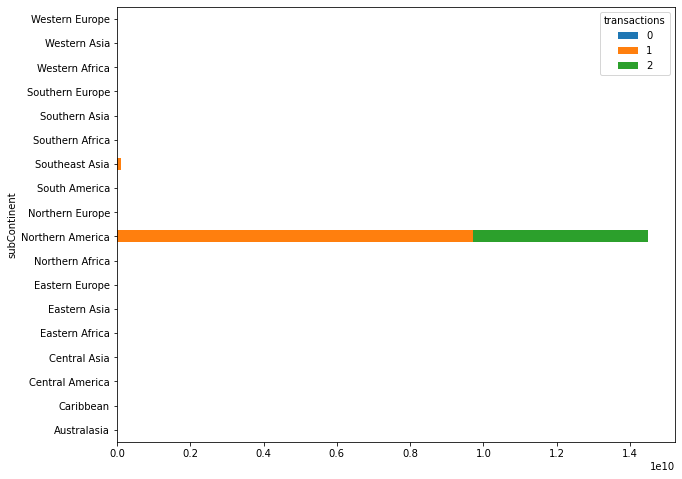

In [35]:
# Transaction revenue by 'subContinent'
df_grouped = df_clean.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

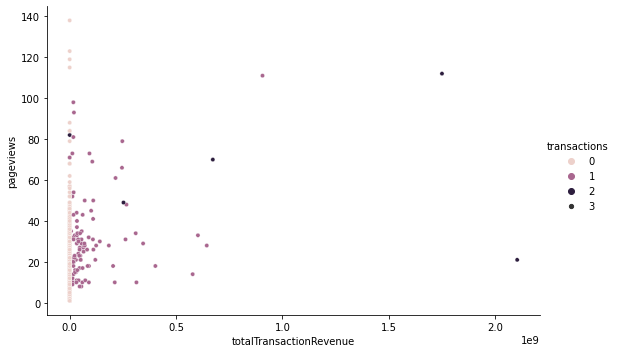

In [36]:
# Transaction revenue and pageviews scartterplot sorted by transactions
sns.relplot(data=df_clean, x='totalTransactionRevenue', y='pageviews', hue='transactions', size=3, aspect=1.5);

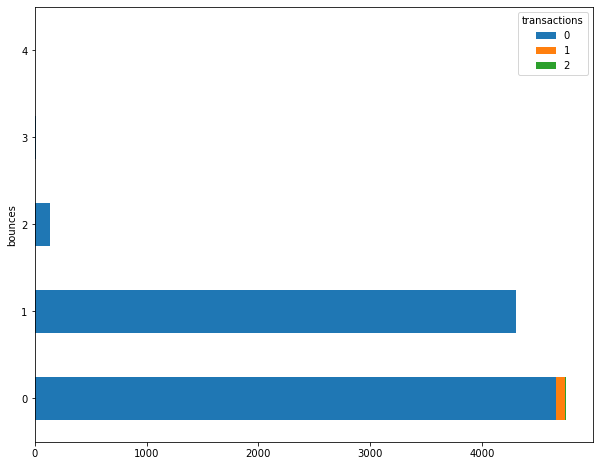

In [37]:
# Transaction count for all Transactions by 'bounces'
df_grouped = df_clean.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

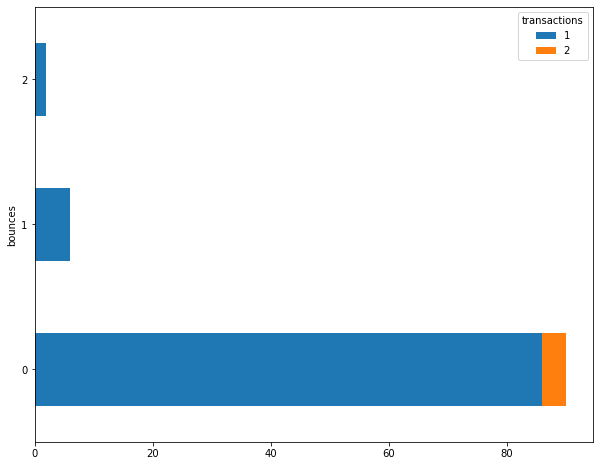

In [38]:
# Transaction count for none zero Transactions by 'bounces'
df_grouped = df_none_zero.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

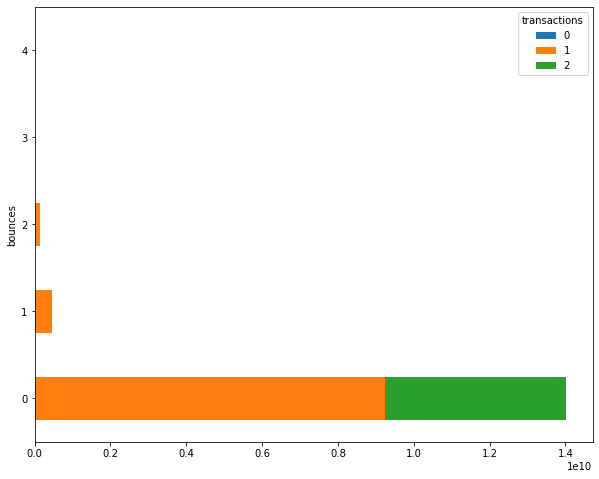

In [39]:
# Transaction revenue by 'bounces'
df_grouped = df_clean.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

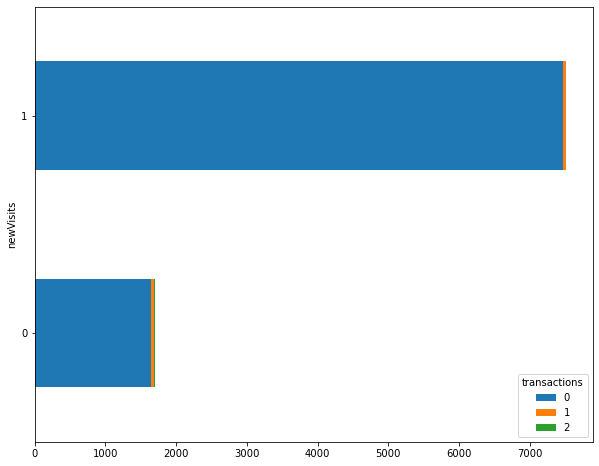

In [40]:
# Transaction count for all Transactions by 'newVisits'
df_grouped = df_clean.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

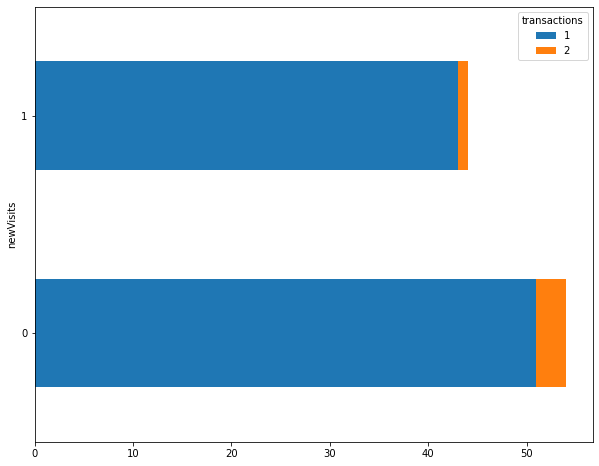

In [41]:
# Transaction count for none zero Transactions by ''newVisits'
df_grouped = df_none_zero.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

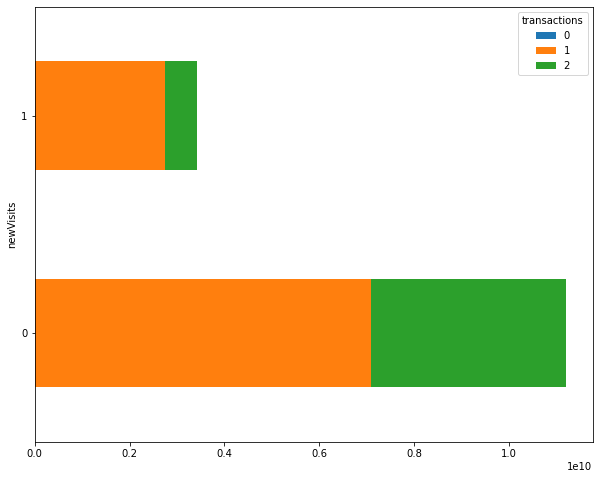

In [42]:
# Transaction revenue by 'newVisits'
df_grouped = df_clean.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

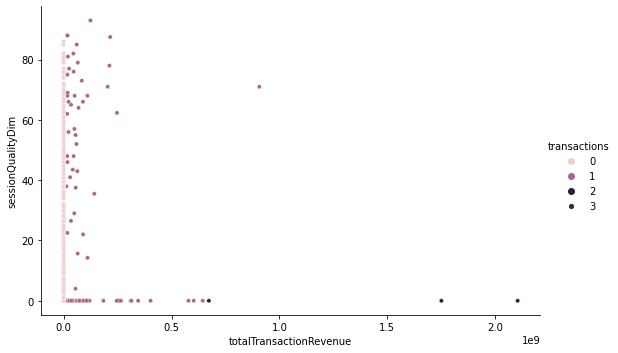

In [43]:
# Transaction revenue and pageviews scatterpolt sorted by transactions
sns.relplot(data=df_clean, x='totalTransactionRevenue', y='sessionQualityDim', hue='transactions', size=3, aspect=1.5);

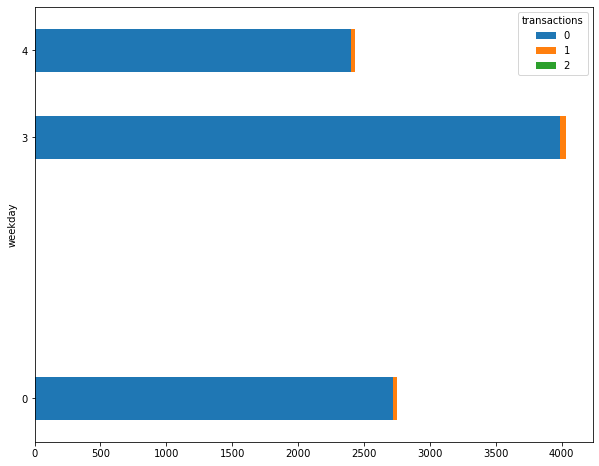

In [44]:
# Transaction count for all Transactions by 'weekday'
df_grouped = df_clean.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

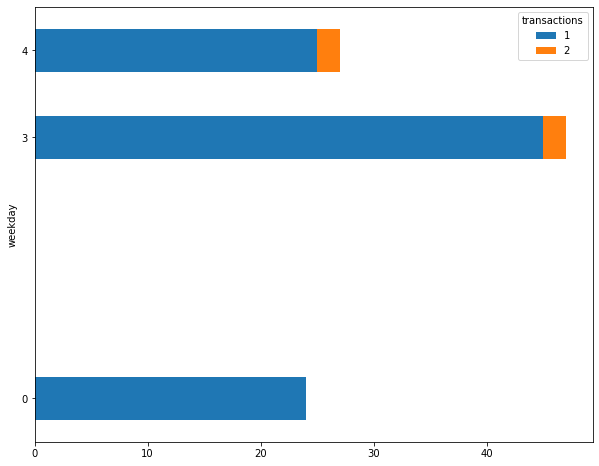

In [45]:
# Transaction count for none zero Transactions by ''weekday'
df_grouped = df_none_zero.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

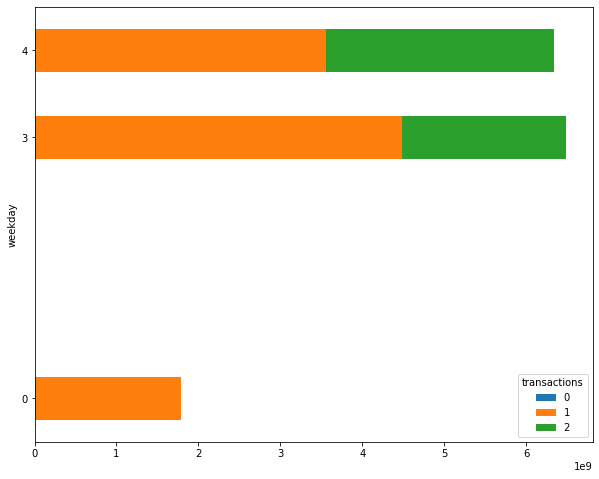

In [46]:
# Transaction revenue by 'weekday'
df_grouped = df_clean.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

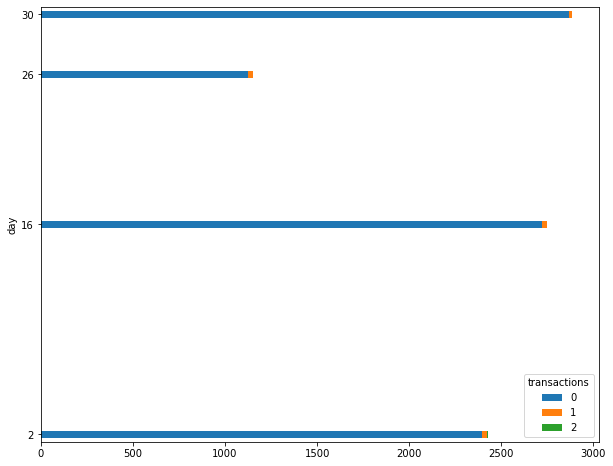

In [47]:
# Transaction count for all Transactions by 'day'
df_grouped = df_clean.groupby(['day', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

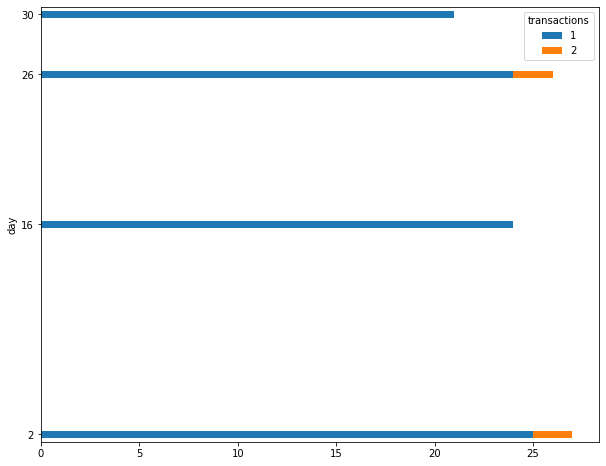

In [48]:
# Transaction count for none zero Transactions by 'day'
df_grouped = df_none_zero.groupby(['day', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

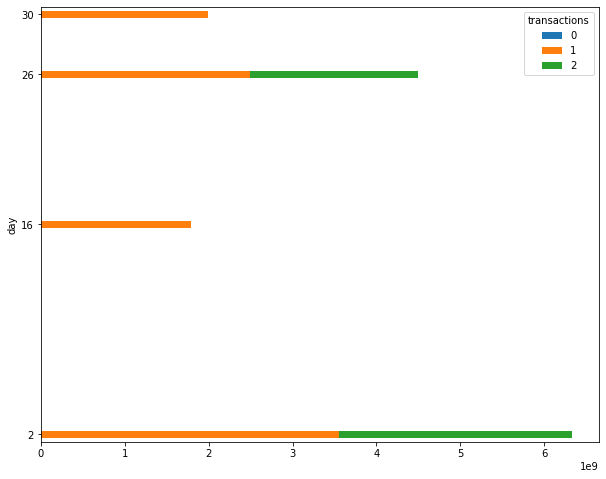

In [49]:
# Transaction revenue by 'day'
df_grouped = df_clean.groupby(['day', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

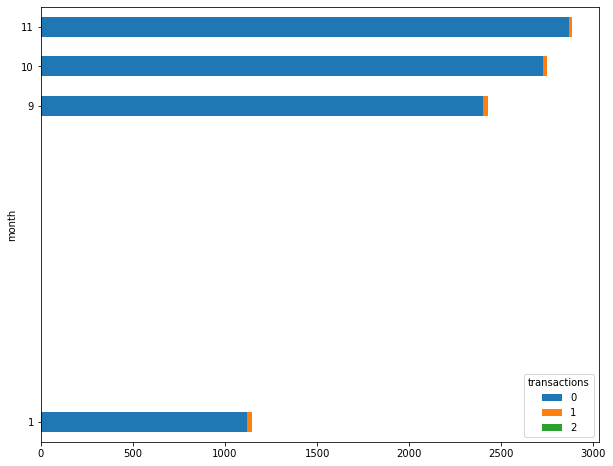

In [50]:
# Transaction count for all Transactions by 'month'
df_grouped = df_clean.groupby(['month', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

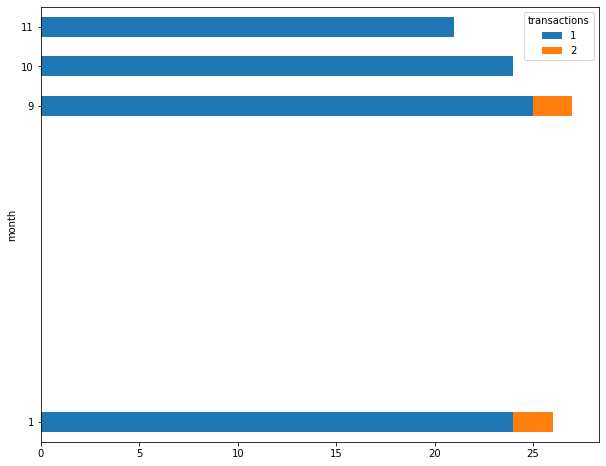

In [51]:
# Transaction count for none zero Transactions by 'month'
df_grouped = df_none_zero.groupby(['month', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

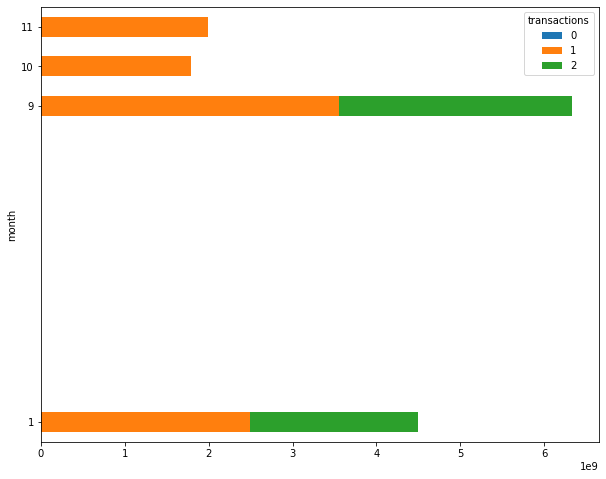

In [52]:
# Transaction revenue by 'month'
df_grouped = df_clean.groupby(['month', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

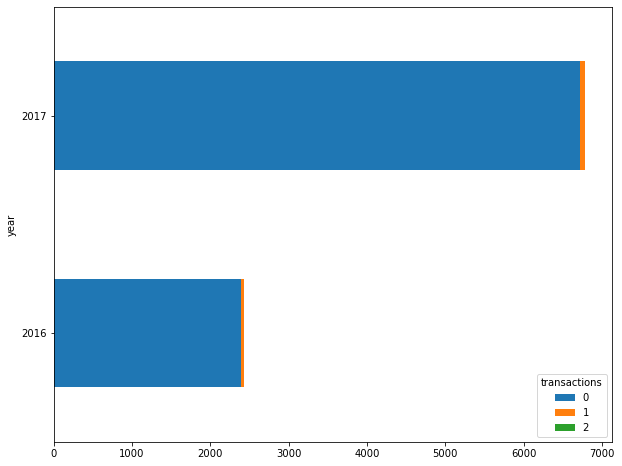

In [53]:
# Transaction count for all Transactions by 'year'
df_grouped = df_clean.groupby(['year', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

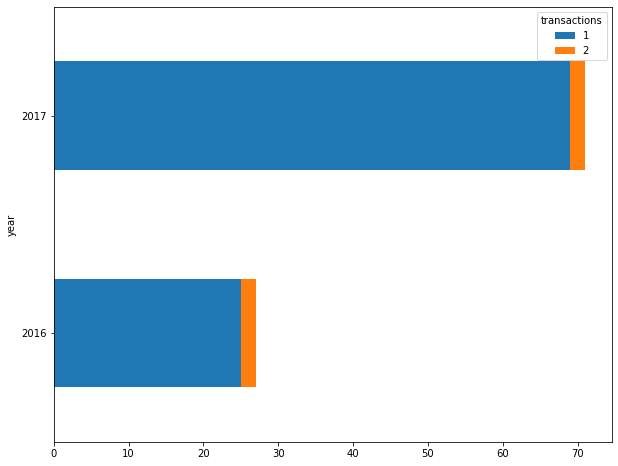

In [54]:
# Transaction count for none zero Transactions by 'year'
df_grouped = df_none_zero.groupby(['year', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

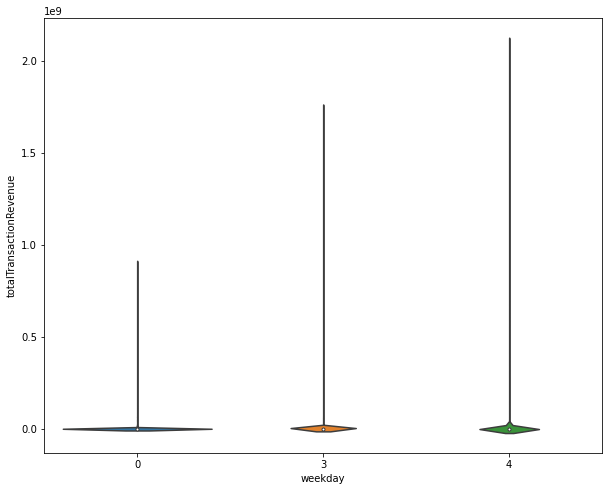

In [55]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_clean, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

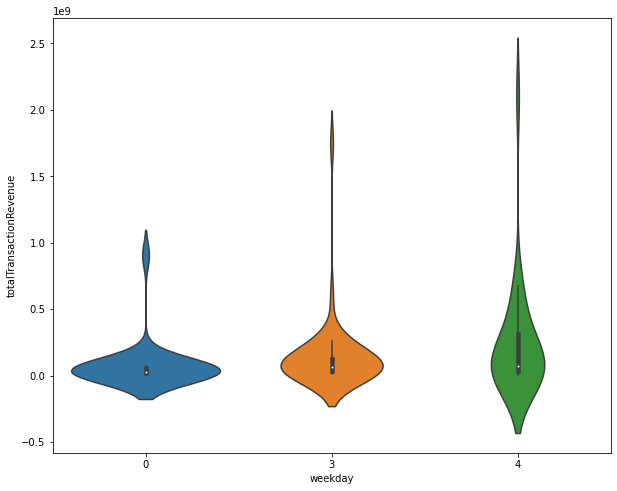

In [56]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

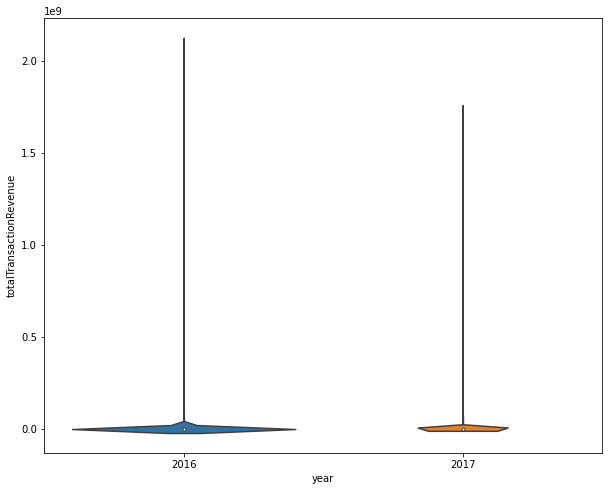

In [57]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_clean, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

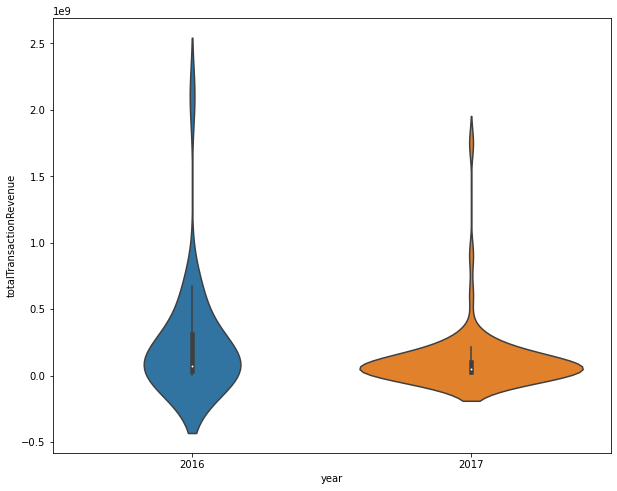

In [58]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

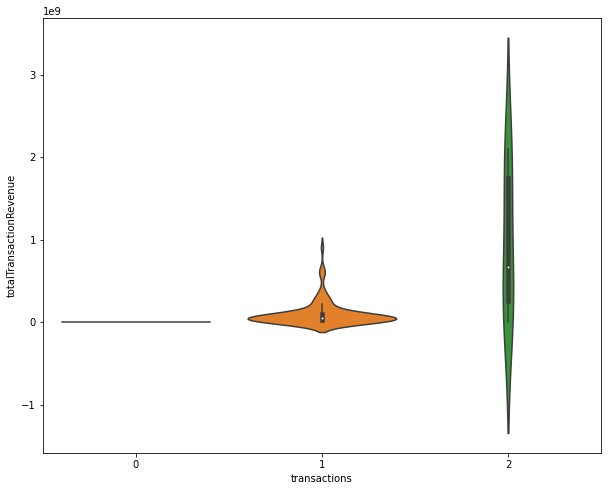

In [59]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_clean, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

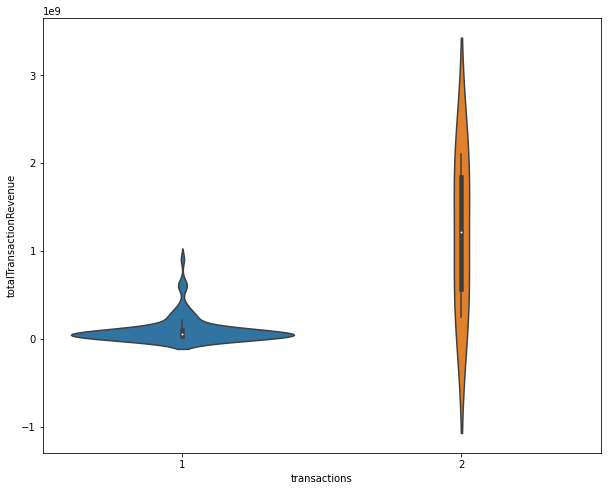

In [60]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

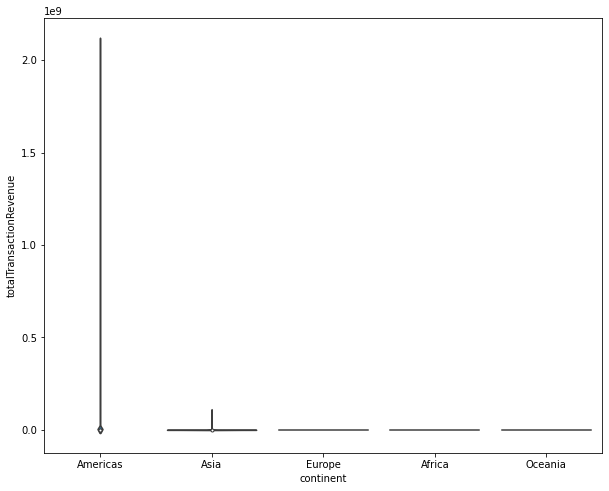

In [61]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_clean, x = 'continent', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

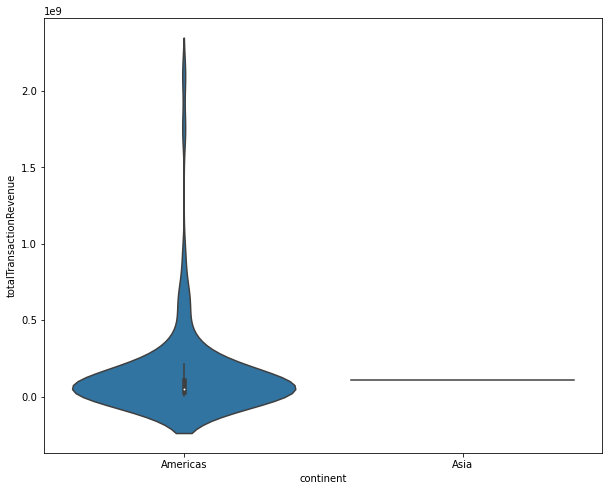

In [62]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'continent', y = 'totalTransactionRevenue')